**Import the necessary libraries**

In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split

In [2]:
#For proper display of all columns
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
# Load the dataset
performance_data = pd.read_csv('starcraft_player_data.csv')
performance_data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [4]:
def check_missing_values(performance_dataframe):
  """ 
  This function displays the number of missing values in all the columns of the dataset.

  Args:
  performance_dataframe : pandas dataframe of the given dataset

  Returns:
  prints column_name: number of missing values for all columns

  """
  #Calculate the total number of missing values for all columns
  missing_values = performance_dataframe.isnull().sum()

  # Create a DataFrame to display the missing value information
  missing_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})

  # Sort the DataFrame by the number of missing values (descending order)
  missing_df = missing_df.sort_values('Missing Values', ascending=False).reset_index(drop=True)

  # Print the missing values information
  print("Missing Values in Dataset:")
  print(missing_df)


**Check for missing values**

In [5]:
check_missing_values(performance_data) #call the previously defined function to check for missing values

Missing Values in Dataset:
                  Column  Missing Values
0                 GameID               0
1            LeagueIndex               0
2       ComplexUnitsMade               0
3        UniqueUnitsMade               0
4            WorkersMade               0
5       TotalMapExplored               0
6           ActionsInPAC               0
7          ActionLatency               0
8         GapBetweenPACs               0
9           NumberOfPACs               0
10    MinimapRightClicks               0
11        MinimapAttacks               0
12         UniqueHotkeys               0
13       AssignToHotkeys               0
14       SelectByHotkeys               0
15                   APM               0
16            TotalHours               0
17          HoursPerWeek               0
18                   Age               0
19  ComplexAbilitiesUsed               0


**It appears that there are no NaN values in the data. Check for erroneous data**

In [6]:
performance_data.dtypes #all the data must be numerical, so verify that datatype of the columns is not object

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

**It appears that 3 columns have object datatype. Check the data to see if the columns are being considered as categorical.**

In [7]:
def check_categorical_features(performance_dataframe):
  """
  This function displays the statistics of categorical columns in the dataset, if present. 

  Args:
  performance_dataframe : pandas dataframe of the given dataset

  Returns:
  Prints statistics of the categorical columns. If no categorical columns are found, prints a message ""No categorical features"

  """
  # Identify columns with object or categorical data types
  categorical_columns = performance_dataframe.select_dtypes(include=['object', 'category']).columns.tolist()

  # Display statistics for categorical columns
  if len(categorical_columns) > 0:
    categorical_stats = performance_dataframe[categorical_columns].describe(include='all')
    print(categorical_stats)
  else:
    print("No categorical features")

In [8]:
check_categorical_features(performance_data) #call the previously defined function to check for categorical_features

         Age HoursPerWeek TotalHours
count   3395         3395       3395
unique    29           33        238
top       20           10        500
freq     357          411        328


**Check the unique values to see what caused the numerical columns to be considered as categorical**

In [11]:
performance_data['Age'].unique()

array(['27', '23', '30', '19', '32', '21', '17', '20', '18', '16', '26',
       '38', '28', '25', '22', '29', '24', '35', '31', '33', '37', '40',
       '34', '43', '41', '36', '44', '39', '?'], dtype=object)

In [12]:
performance_data['HoursPerWeek'].unique()

array(['10', '20', '6', '8', '42', '14', '24', '16', '4', '12', '30',
       '28', '70', '2', '56', '36', '40', '18', '96', '50', '168', '48',
       '84', '0', '72', '112', '90', '32', '98', '140', '?', '80', '60'],
      dtype=object)

In [13]:
performance_data['TotalHours'].unique()

array(['3000', '5000', '200', '400', '500', '70', '240', '10000', '2708',
       '800', '6000', '190', '350', '1000', '1500', '2000', '120', '1100',
       '2520', '700', '160', '150', '250', '730', '230', '300', '100',
       '270', '1200', '30', '600', '540', '280', '1600', '50', '140',
       '900', '550', '625', '1300', '450', '750', '612', '180', '770',
       '720', '415', '1800', '2200', '480', '430', '639', '360', '1250',
       '365', '650', '233', '416', '1825', '780', '1260', '315', '10',
       '312', '110', '1700', '92', '2500', '1400', '220', '999', '303',
       '96', '184', '4000', '420', '60', '2400', '2160', '80', '25',
       '624', '176', '?', '35', '1163', '333', '75', '7', '40', '325',
       '90', '175', '88', '850', '26', '1650', '465', '235', '1350',
       '460', '848', '256', '130', '1466', '670', '711', '1030', '1080',
       '1460', '1050', '20000', '582', '2800', '553', '1008', '330',
       '936', '243', '1320', '425', '1145', '366', '2700', '830', '3',
 

**All the three columns contain '?' which caused the error. Replace ? with NaN and convert the columns to numeric. NaN values are imputed later**

In [13]:
def convert_to_numeric(df, column_names):
  """
  This function converts the specified columns in a pandas dataframe to numeric and replaces the non-numeric values with NaN.

  Args:
  Pandas dataframe of the given dataset, list of column names that need conversion

  Returns:
  The specified columns are converted to numeric, non-numeric values are replaced with NaN and stored back in the given dataframe

  """
  for col in column_names:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
convert_to_numeric(performance_data, ['Age','HoursPerWeek','TotalHours']) # call the previously defined function to convert the 3 columns to numeric

In [11]:
performance_data.dtypes #check the datatypes again

GameID                    int64
LeagueIndex               int64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

**Since the erroneous data is corrected, recheck for any missing values and impute accordingly**

In [12]:
check_missing_values(performance_data) #call the check_missing_values function

Missing Values in Dataset:
                  Column  Missing Values
0             TotalHours              57
1           HoursPerWeek              56
2                    Age              55
3                 GameID               0
4         GapBetweenPACs               0
5       ComplexUnitsMade               0
6        UniqueUnitsMade               0
7            WorkersMade               0
8       TotalMapExplored               0
9           ActionsInPAC               0
10         ActionLatency               0
11    MinimapRightClicks               0
12          NumberOfPACs               0
13           LeagueIndex               0
14        MinimapAttacks               0
15         UniqueHotkeys               0
16       AssignToHotkeys               0
17       SelectByHotkeys               0
18                   APM               0
19  ComplexAbilitiesUsed               0


In [18]:
def display_null_values(df, column_names):
  """ 
  This function displays the number of null values(if any) for each unique LeagueIndex value for the specified columns.

  Args:
  Pandas dataframe of the given dataset, list of column names for which number of null values is required

  Returns:
  Number of null values in each of the specified columns for each unique LeagueIndex

  """

  for col in column_names:
    null_values = df[df[col].isnull()]    #identify the null values
    league_counts = null_values["LeagueIndex"].value_counts()   #Count null values for each "LeagueIndex" category
    print(f"Null values for {col}:")   
    for index, count in league_counts.items():
      print(f"LeagueIndex {index}: {count} null values") #print the number of null values(if any) for each LeagueIndex
    print()  # Add an empty line between columns


In [19]:
display_null_values(performance_data, ['Age','HoursPerWeek','TotalHours']) #call the display_null_values function

Null values for Age:
LeagueIndex 8: 55 null values

Null values for HoursPerWeek:
LeagueIndex 8: 55 null values
LeagueIndex 5: 1 null values

Null values for TotalHours:
LeagueIndex 8: 55 null values
LeagueIndex 5: 2 null values



**Since for LeagueIndex=5, there is only 1 missing value for HoursPerWeek and 2 missing values for TotalHours, those rows can be dropped without any significant data loss. The missing values for LeagueIndex=8 are high in number, hence must be imputed**

In [20]:
#Identify the rows with missing values and LeagueIndex=5 and drop them
rows_to_drop = performance_data[(performance_data['LeagueIndex'] == 5) & 
                                performance_data[['Age', 'HoursPerWeek', 'TotalHours']].isnull().any(axis=1)].index

performance_data.drop(rows_to_drop, inplace=True)
performance_data.reset_index(drop=True, inplace=True) # reset the index


In [21]:
display_null_values(performance_data, ['Age','HoursPerWeek','TotalHours']) #call the display_null_values function

Null values for Age:
LeagueIndex 8: 55 null values

Null values for HoursPerWeek:
LeagueIndex 8: 55 null values

Null values for TotalHours:
LeagueIndex 8: 55 null values



**To impute the missing values with LeagueIndex=8, consider the data distribution. Violin plots are useful to explore the relationship between variables across different groups, in this case different league indices**

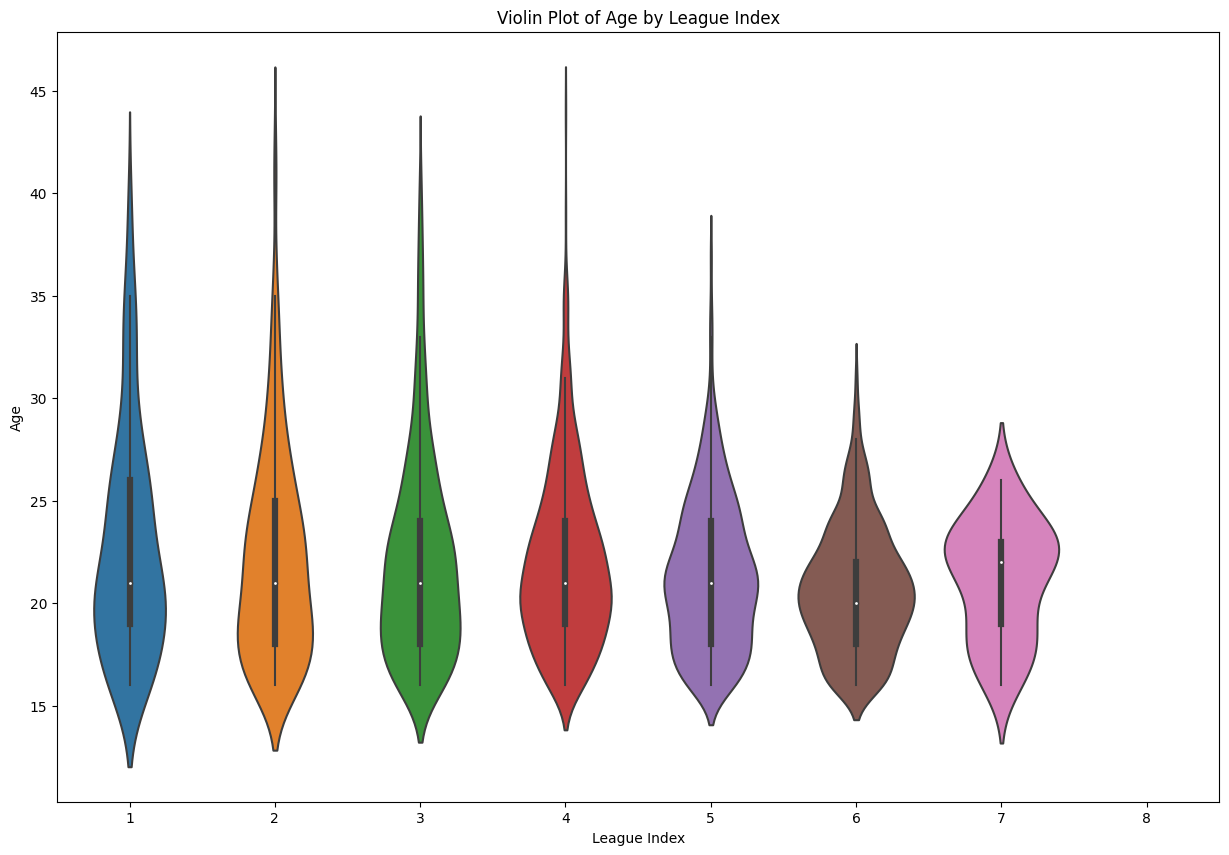

In [22]:
plt.figure(figsize=(15, 10))

#plot a violin plot to understand the distribution of Age across different league indices
sns.violinplot(data=performance_data, x="LeagueIndex", y="Age") 
plt.title("Violin Plot of Age by League Index")
plt.xlabel("League Index")
plt.ylabel("Age")

plt.show()


**It is observed that the distribution of age is similar in the lower leagues(1-5) where there are players of both young and older generation. In higher leagues there are more young players with LeagueIndex=7 being the group with all players under 30 . For the highest LeagueIndex=8, it follows that the median age of LeagueIndex=7 has to be imputed.**

In [23]:
agevalue_to_impute = performance_data[performance_data["LeagueIndex"] == 7]["Age"].median() #find the median age of LeagueIndex=7
performance_data["Age"] = performance_data["Age"].fillna(agevalue_to_impute)  #impute the values 

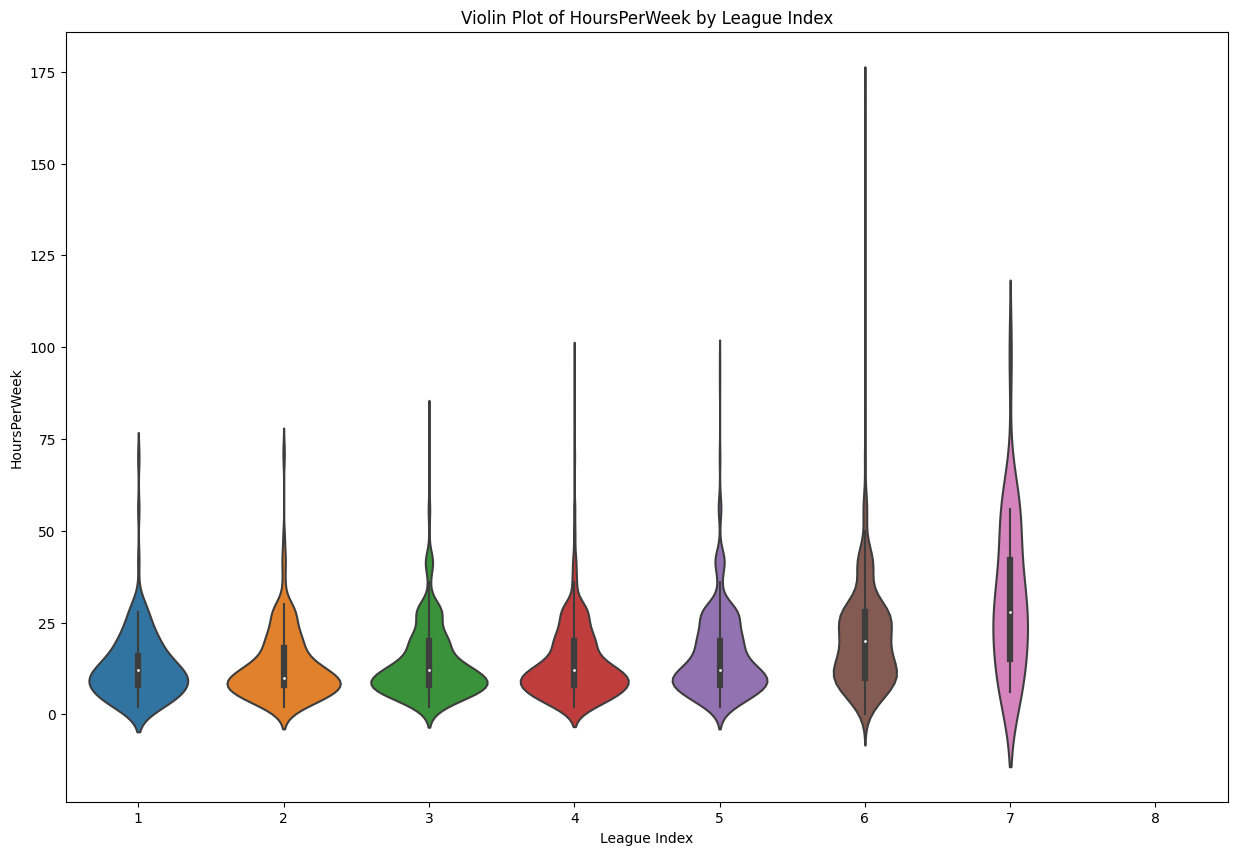

In [24]:
plt.figure(figsize=(15, 10))

#plot a violin plot to understand the distribution of HoursPerWeek across different league indices
sns.violinplot(data=performance_data, x="LeagueIndex", y="HoursPerWeek")

plt.title("Violin Plot of HoursPerWeek by League Index")
plt.xlabel("League Index")
plt.ylabel("HoursPerWeek")

plt.show()

**Once again it is observed that distribution is similar in the lower leagues(1-5). In LeagueIndex=6, there are some players who spent more hours than LeagueIndex=7. Considering the data distribution of LeagueIndex=6 and 7, it is more appropriate to impute the missing values of LeagueIndex=8 with median HoursPerWeek of LeagueIndex=7.**

In [27]:
hoursvalue_to_impute = performance_data[performance_data["LeagueIndex"] == 7]["HoursPerWeek"].median() #find the median HoursPerWeek of LeagueIndex=7
performance_data["HoursPerWeek"] = performance_data["HoursPerWeek"].fillna(hoursvalue_to_impute) # impute the values 

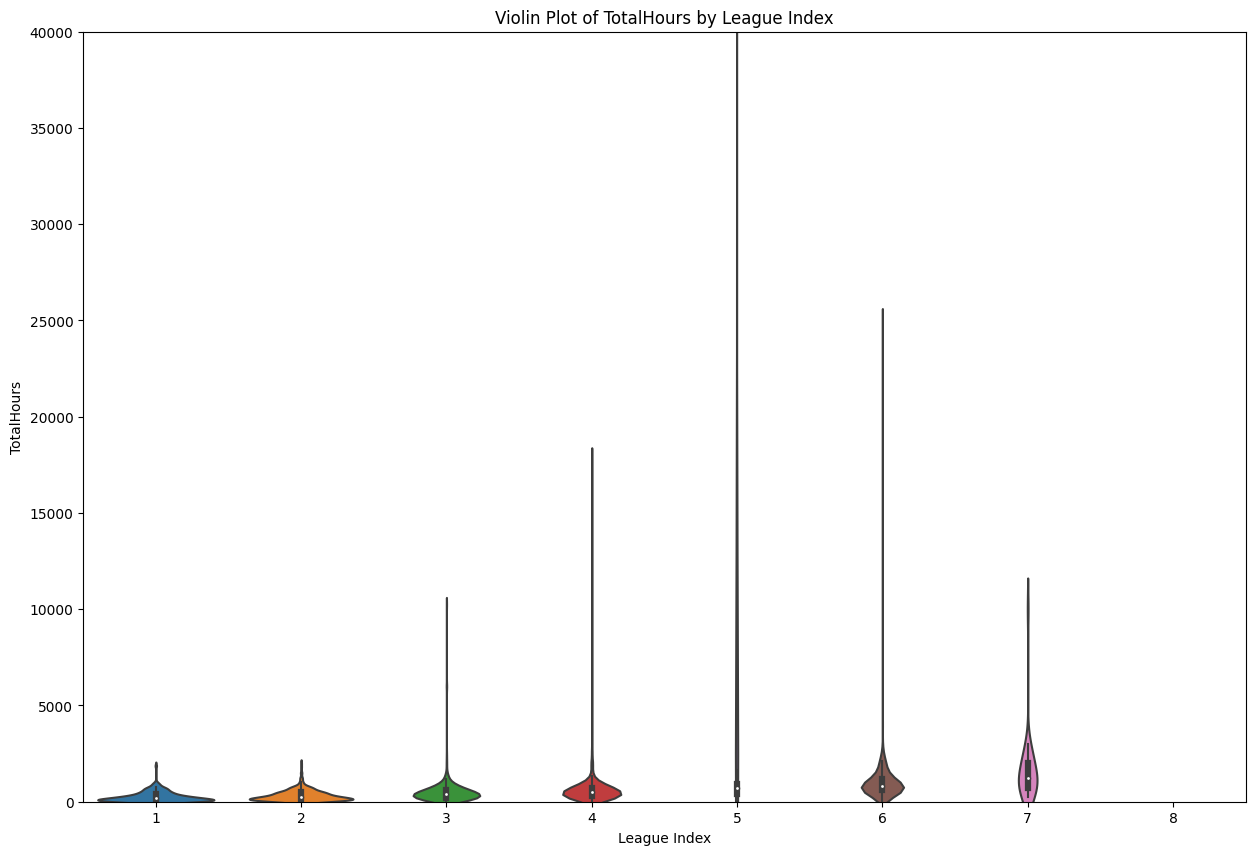

In [26]:
plt.figure(figsize=(15, 10))

#plot a violin plot to understand the distribution of TotalHours across different league indices
sns.violinplot(data=performance_data, x="LeagueIndex", y="TotalHours")

plt.title("Violin Plot of TotalHours by League Index")
plt.xlabel("League Index")
plt.ylabel("TotalHours")
plt.ylim(0, 40000)
plt.show()

**There is no specific pattern in the distribution of TotalHours. Considering it takes experience to reach the top leagues and experience is gained over time, TotalHours should be high for LeagueIndex=8. The median of 3 highest leagues after 8,that is median TotalHours of LeagueIndex=5,6,7 is imputed.**  

In [28]:
# Calculate the median of TotalHours for LeagueIndex 5, 6, and 7
totalhours_to_impute = performance_data.loc[performance_data['LeagueIndex'].isin([5, 6, 7]), 'TotalHours'].median()

# Replace missing values in TotalHours for LeagueIndex 8 with the median
performance_data.loc[(performance_data['LeagueIndex'] == 8) & (performance_data['TotalHours'].isnull()), 'TotalHours'] = totalhours_to_impute

**After imputation, perform one final check for missing values**

In [29]:
check_missing_values(performance_data)

Missing Values in Dataset:
                  Column  Missing Values
0                 GameID               0
1            LeagueIndex               0
2       ComplexUnitsMade               0
3        UniqueUnitsMade               0
4            WorkersMade               0
5       TotalMapExplored               0
6           ActionsInPAC               0
7          ActionLatency               0
8         GapBetweenPACs               0
9           NumberOfPACs               0
10    MinimapRightClicks               0
11        MinimapAttacks               0
12         UniqueHotkeys               0
13       AssignToHotkeys               0
14       SelectByHotkeys               0
15                   APM               0
16            TotalHours               0
17          HoursPerWeek               0
18                   Age               0
19  ComplexAbilitiesUsed               0


**It is observed from violin plots that there are outliers in the data. To identify outliers plot boxplots for all the columns.**

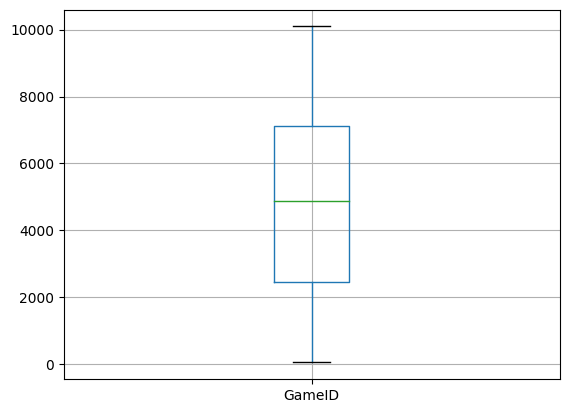

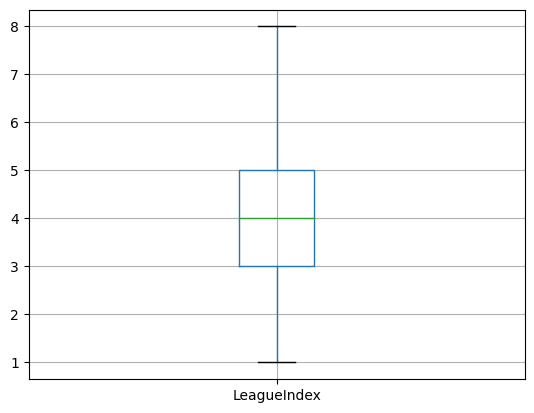

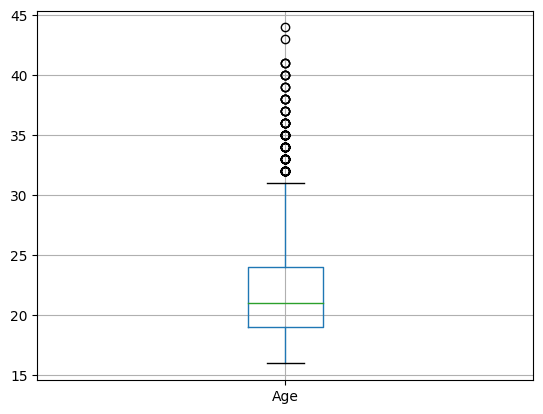

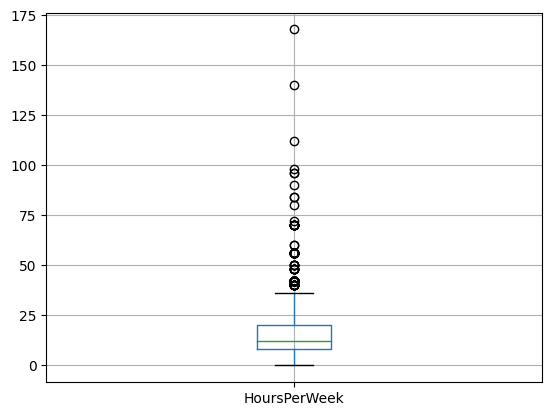

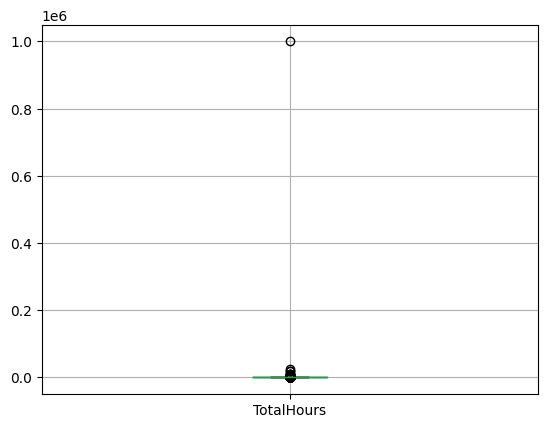

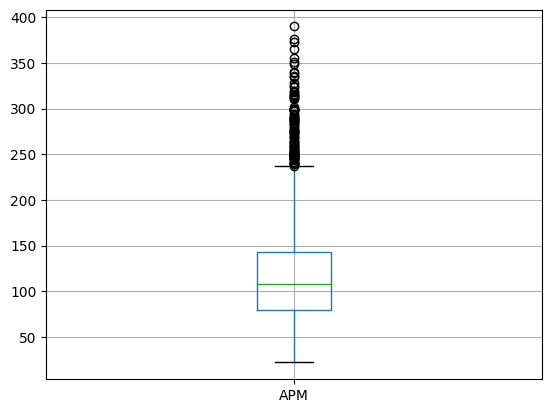

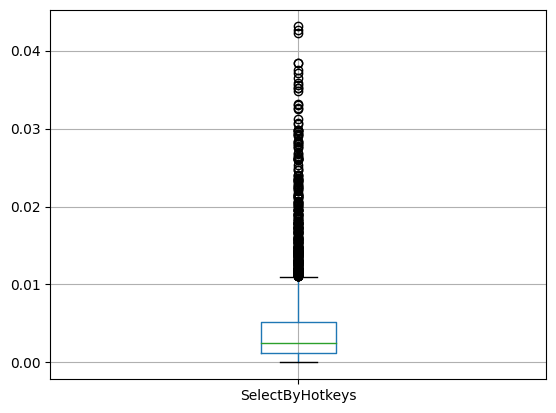

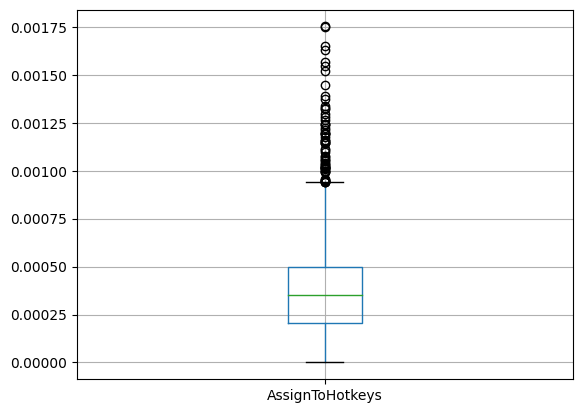

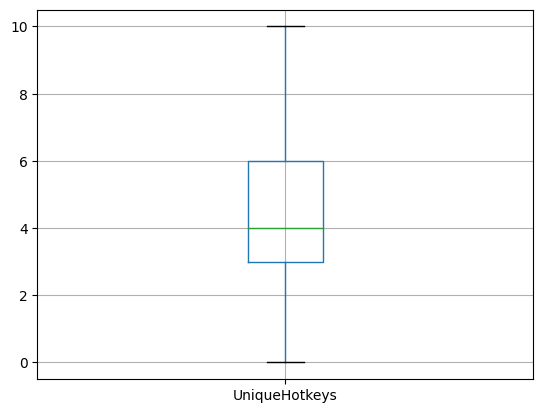

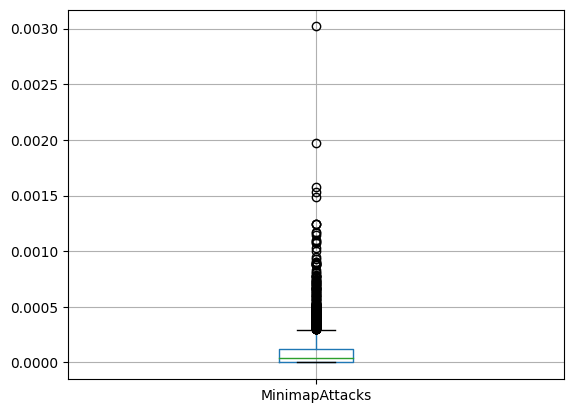

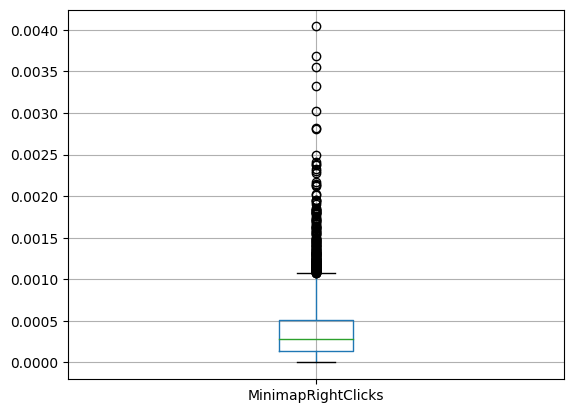

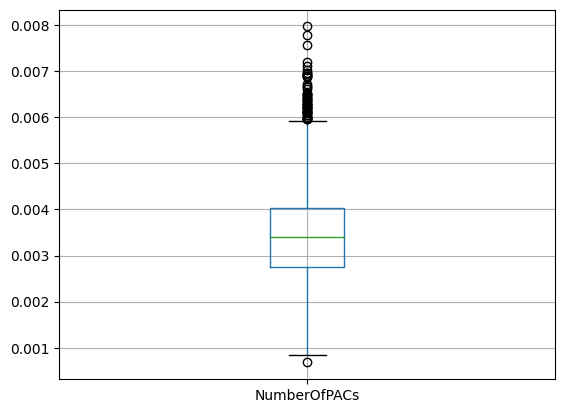

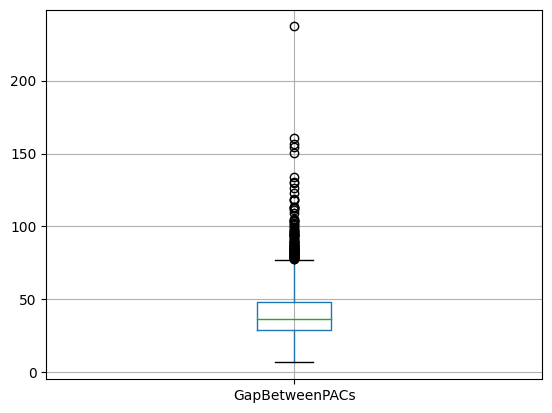

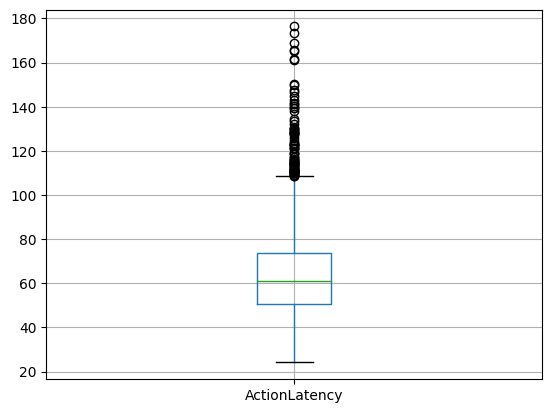

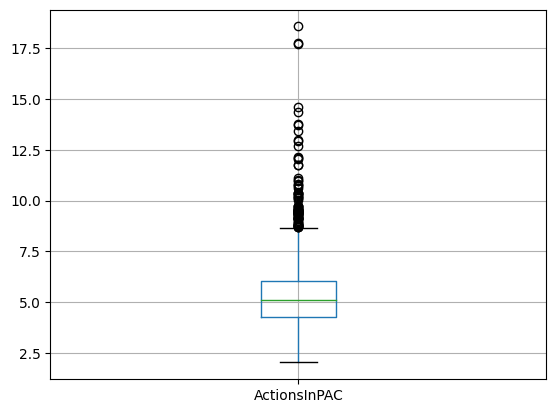

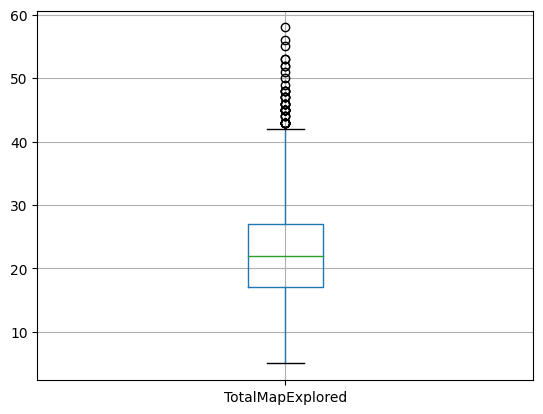

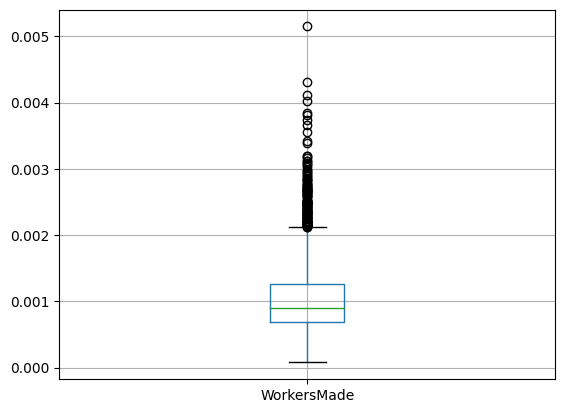

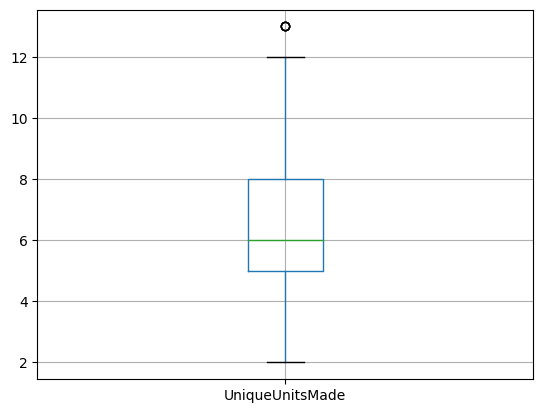

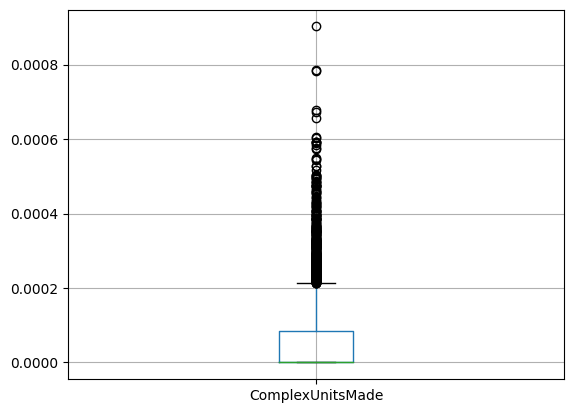

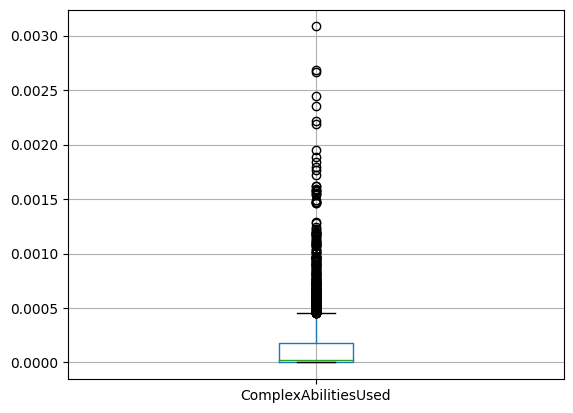

In [30]:
#plotting boxplots for all columns in the data
for i in performance_data.columns:
    performance_data.boxplot(column=i)
    plt.show()

**The outliers in columns describing player's performance(like APM, Action Latency, SelectByHotkeys,TotalMapExplored,etc.) are valid because there will always be player's with outstanding abilities, especially in the higher leagues. The outliers in HoursPerWeek and TotalHours must be treated before moving on to analysis.**

In [32]:
#Find the 10 highest values in the HoursPerWeek column to identify outliers
highest_values_hoursperweek = performance_data['HoursPerWeek'].nlargest(10)
print(highest_values_hoursperweek)

689     168.0
1676    140.0
1279    112.0
1653     98.0
237      96.0
2660     96.0
1298     90.0
894      84.0
1795     84.0
2157     80.0
Name: HoursPerWeek, dtype: float64


**There are 168 hours in a week. Considering that 6 hours sleep is a must for humans to be healthy, especially for players who need to be at the top of thier game always, and players spend the rest of their time only playing, the maximum number of hours per day is 24-7=18. In a week, the maximum possible number of hours is 126 only. Replace all values >126 with 126.**

In [33]:
#Find the 10 highest values in the TotalHours column to identify outliers
highest_values_totalhours = performance_data['TotalHours'].nlargest(10)
print(highest_values_totalhours)


1792    1000000.0
2322      25000.0
769       20000.0
1976      18000.0
2214      10260.0
7         10000.0
2138       9000.0
10         6000.0
3251       6000.0
1          5000.0
Name: TotalHours, dtype: float64


**Since the maximum hours per week is 126, in a year the maximum total hours is 6552. Considering a 5 year period, the maximum total hours is 32760. 1000000 is clearly an error because 1000000/6552 = 152. 152 year period is impossible for any player. Replace 1000000 with the next highest value of TotalHours.**

In [34]:
#Replacing hoursperweek values greater than 126 with 126
performance_data.loc[performance_data["HoursPerWeek"] > 126, "HoursPerWeek"] = 126

#Replacing the erroneous TotalHours 
performance_data.loc[performance_data["TotalHours"] > 25000, "TotalHours"] = 25000


**Visualizing LeagueIndex in a better way to understand the distribution**

4    0.239022
5    0.236958
6    0.183024
3    0.162983
2    0.102269
1    0.049219
8    0.016210
7    0.010315
Name: LeagueIndex, dtype: float64


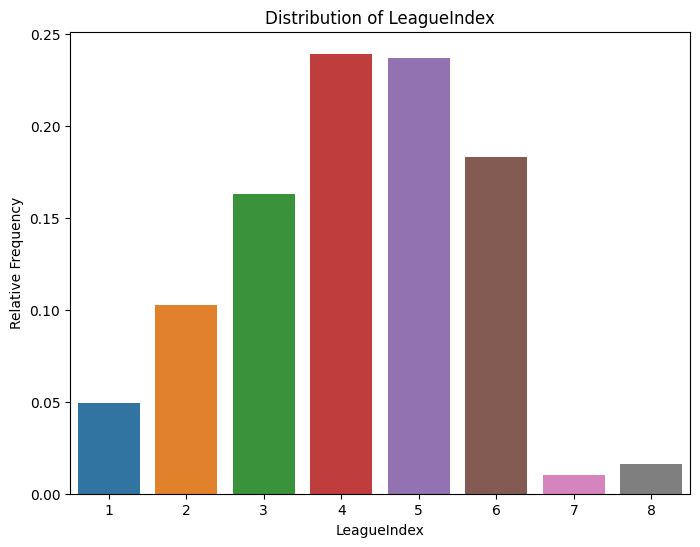

In [47]:
# Count the frequency of each value in the "LeagueIndex" column
league_counts = performance_data['LeagueIndex'].value_counts()

# Calculate the relative frequencies
league_distribution = league_counts / league_counts.sum()

# Display the frequency table
print(league_distribution)

# Plot a bar chart to visualize the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=league_distribution.index, y=league_distribution.values)
plt.xlabel('LeagueIndex')
plt.ylabel('Relative Frequency')
plt.title('Distribution of LeagueIndex')
plt.show()

**The class distribution is highly imbalanced. LeagueIndex=7,8 have very few players which is valid as there are only a few top players in a game. While this distribution is valid in the context of gaming, imbalance might affect ML algorithms. At a later stage, check if oversampling works.**

**The target variable is ordinal. So Spearman's Rank Correlation Coefficient is appropriate to analyze the relationship between target variable and input variables.**

In [36]:
# Drop the "LeagueIndex" column from performance_data to obtain a list of input variables 
input_variables = performance_data.drop("LeagueIndex", axis=1).columns.tolist()

# Store LeagueIndex separately
target_variable = "LeagueIndex"

# Calculate Spearman's rank correlation coefficient for each input variable and target variable 
correlation_results = {}
for var in input_variables:
    correlation, p_value = spearmanr(performance_data[var], performance_data[target_variable])
    correlation_results[var] = (correlation, p_value)

# Print the correlation coefficient and p-value
for var, (correlation, p_value) in correlation_results.items():
    print(f"{var}: correlation = {correlation}, p-value = {p_value}")



GameID: correlation = 0.07118389066019166, p-value = 3.322416332338032e-05
Age: correlation = -0.06900917496354272, p-value = 5.744617496715003e-05
HoursPerWeek: correlation = 0.25202770545866593, p-value = 2.5748246173548014e-50
TotalHours: correlation = 0.49982449287150094, p-value = 5.972784263703734e-214
APM: correlation = 0.6762313223094165, p-value = 0.0
SelectByHotkeys: correlation = 0.5952501818709952, p-value = 0.0
AssignToHotkeys: correlation = 0.5174618212674931, p-value = 8.623143617627593e-232
UniqueHotkeys: correlation = 0.35273280066281815, p-value = 5.631528385003887e-100
MinimapAttacks: correlation = 0.3660515231828183, p-value = 4.35819122252121e-108
MinimapRightClicks: correlation = 0.2382835053815195, p-value = 5.183826432430295e-45
NumberOfPACs: correlation = 0.6065617947489607, p-value = 0.0
GapBetweenPACs: correlation = -0.5519701003372527, p-value = 6.733983654636989e-270
ActionLatency: correlation = -0.6869410352103493, p-value = 0.0
ActionsInPAC: correlation =

**Insights from Spearman's Correlation Analysis:**

**GameID, Age, ActionsInPAC, UniqueUnitsMade, ComplexUnitsMade, and ComplexAbilitiesUsed have very weak correlation(<0.2) with the target variable LeagueIndex. Since GameId is just a unique number given to each player for identification, it can be dropped. Although, Age has weak correlation, it might be useful in analysis considering there are young, middle-aged, and old players(high variance). The other variables also need to be explored further before making a decision to drop.**


**As all the input variables are numerical, Pearson's Correlation Coefficient is sufficient to find the relationship of input variables with each other**

<Axes: >

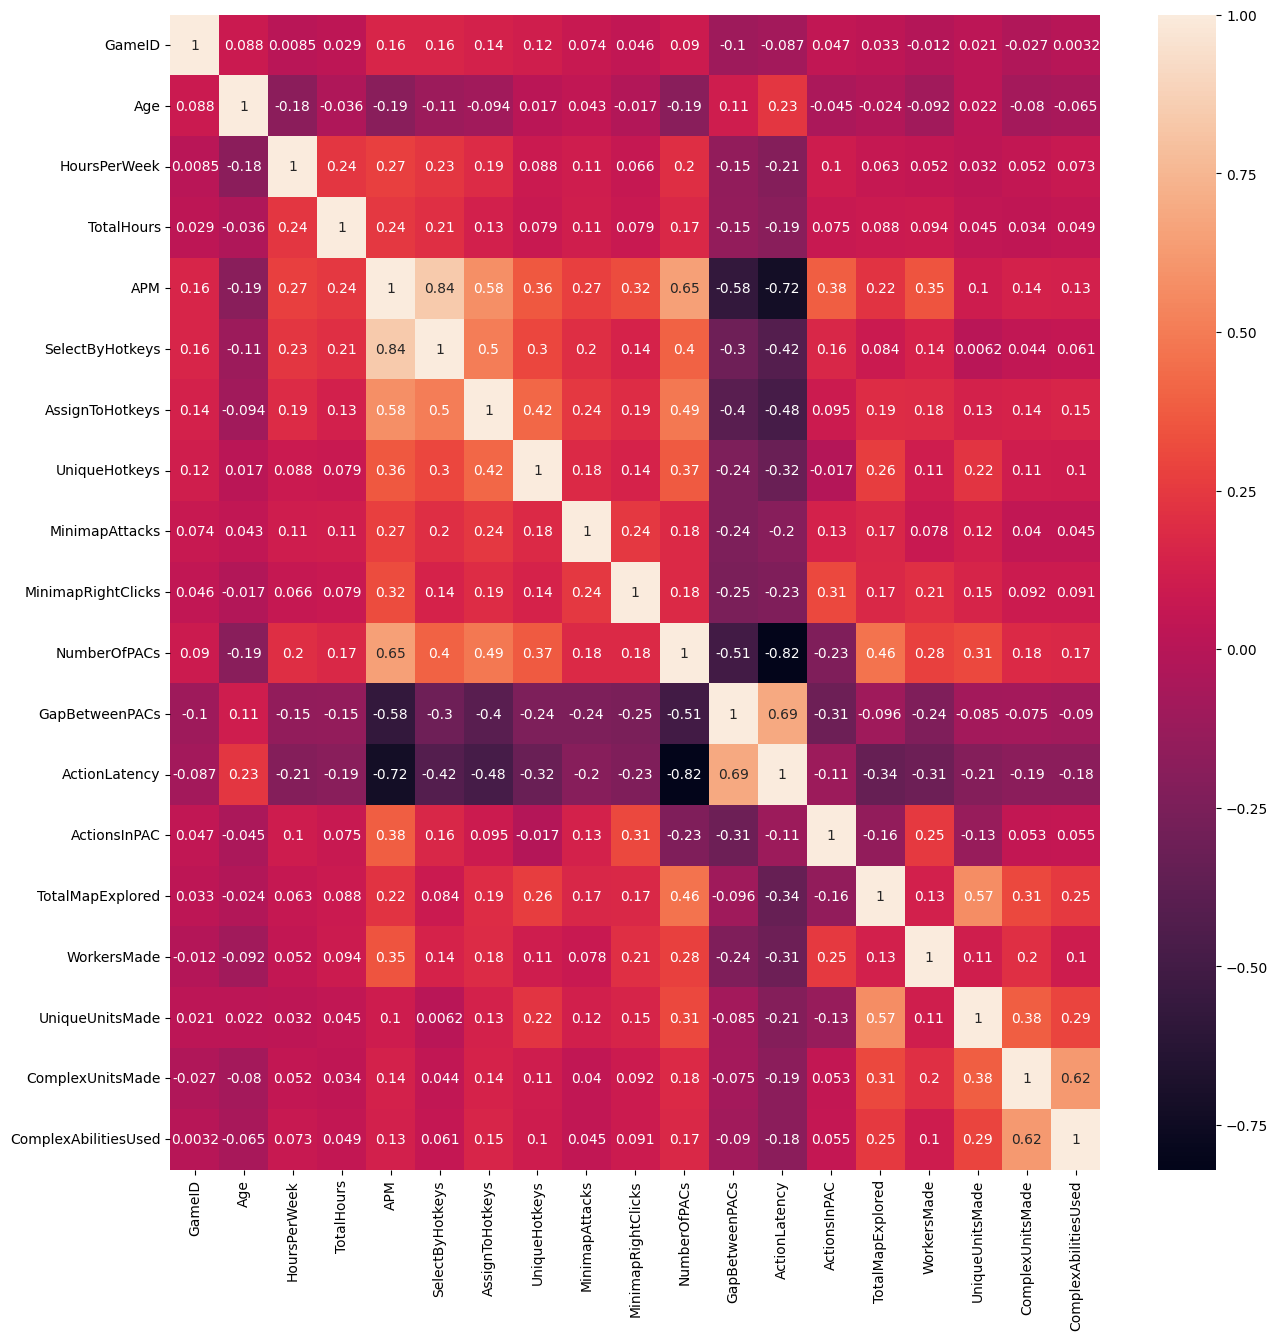

In [37]:
input_variables_dataframe = performance_data.drop("LeagueIndex", axis=1) #create a dataframe of input variables
plt.figure(figsize=(15, 15))
corr = input_variables_dataframe.corr() #compute the correlation matrix of the input variables dataframe
sns.heatmap(corr, annot=True)

**Insights:**

**Pearson's correlation coefficient value >0.5 indicates a strong correlation. If two input variables are highly correlated, one of them can be dropped.**

**APM(Actions per minute) is highly correlated with SelectByHotkeys, AssignToHotkeys, NumberOfPACs, GapBetweenPACs, ActionLatency.**

**NumberOfPACs is highly correlated with APM, GapBetweenPACs, ActionLatency. GapBetweenPACs is highly correlated with APM, NumberOfPACs, ActionLatency.** 

**Therefore, APM, NumberOfPACs,and GapBetweenPACs should be dropped to eliminate redundancy. ActionLatency captures all the required information from these variables.**

**TotalMapExplored is highly correlated with UniqueUnitsMade. Since UniqueUnitsMade also has a weak correlation with target variable, it can be dropped.**

**ComplexUnitsMade and ComplexAbilitiesUsed are highly correlated, ComplexUnitsMade can be dropped, as abilities used contribute more to player's rank.**

**Finally, ActionsInPAC can be dropped as it has weak correlation with the target and no other variables will be affected.**


In [39]:
#create a dataframe for features(input variables) after dropping redundant variables
performance_features = performance_data.drop(["LeagueIndex","GameID","APM","NumberOfPACs","GapBetweenPACs","UniqueUnitsMade","ComplexUnitsMade","ActionsInPAC"],axis=1)
#store the target variable separately
player_rank = performance_data["LeagueIndex"]


**Split the data into train and test sets in 70:30 ratio**

In [42]:
# Splitting the data into train and test sets using sklearn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(performance_features, player_rank , test_size=0.3, random_state=42)

**Standardize the data. As different features have different scales, standardization is must**

In [43]:
def standardize_train_data(X):
  """
  This function standardizes the training data to have a mean 0 and standard deviation 1.

  Args:
  Pandas dataframe of features(input variables)-train set

  Returns:
  Standardized dataframe of features-train set,mean of features,and standard deviation of features

  """
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0)
  x_standardized = (X - mean) / std
  return x_standardized, mean, std


In [44]:
def standardize_test_data(X, TrainMean, TrainStd):
  """
  This function standardizes the test data to have a mean 0 and standard deviation 1 using the mean and standard deviation of train data.

  Args:
  Pandas dataframe of features(input variables)-test set, mean of train set, standard deviation of train set 

  Returns:
  Standardized dataframe of features-test set

  """
  x_standardized = ( X - TrainMean ) / TrainStd
  return x_standardized

In [45]:
standardized_X_train, mean_value, std_value = standardize_train_data(X_train) #standardize the train data
standardized_X_train.head()

,Age,HoursPerWeek,TotalHours,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,ActionLatency,TotalMapExplored,WorkersMade,ComplexAbilitiesUsed
994,1.032534,-0.515785,0.299624,-0.199682,-1.071313,-1.011811,0.063951,-0.628694,0.807712,-0.675531,-0.745387,-0.549753
464,0.078530,-0.854789,-0.077366,-0.548630,-0.282188,-0.158000,0.594974,0.622236,-1.497101,2.788228,-0.270382,-0.274460
1097,-0.159972,-0.346283,-0.077366,0.543157,-0.675928,-0.158000,0.077209,-0.690407,-0.513875,0.390241,-0.027588,-0.549753
1073,2.225040,-0.346283,-0.218737,-0.497451,-0.653753,0.695811,-0.392790,-0.496859,2.564425,-0.542310,-0.967613,-0.549753
3352,0.078530,1.009732,0.045156,4.337062,6.041268,0.695811,-0.445543,3.989351,-1.442074,-0.409088,-0.751702,-0.254537


In [46]:
standardized_X_test = standardize_test_data(X_test, mean_value, std_value) #standardize the test data
standardized_X_test.head()

,Age,HoursPerWeek,TotalHours,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,ActionLatency,TotalMapExplored,WorkersMade,ComplexAbilitiesUsed
291,-0.875475,-0.346283,-0.247011,1.948438,1.093750,0.268905,-0.180497,-0.049961,0.280216,-1.341639,0.392260,-0.549753
997,0.078530,0.331724,0.111129,-0.500817,-0.109319,0.268905,-0.291346,0.148964,0.873942,-0.941974,-0.654040,-0.318289
2091,2.702042,-0.346283,-0.614576,-0.610858,-0.610131,-0.584905,-0.518918,-0.709553,2.495049,-0.275867,-1.199032,-0.549753
432,-0.159972,2.196245,0.016882,-0.162355,0.187360,1.549622,-0.260991,-0.313614,-0.083412,0.656684,-0.079191,0.475333
479,0.317031,-1.024291,-0.595727,-0.267356,0.293951,0.268905,-0.309237,-0.390535,0.148644,-0.542310,-0.100821,0.794646


**Model Building:**

**This is a multi-class classification problem. Take Logistic Regression (multinomial) as the base model. Tree-based algorithms and ensemble learning algorithms might perform well in this case.**

**Multinomial Logistic Regression:**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

              precision    recall  f1-score   support

           1       0.56      0.28      0.37        54
           2       0.34      0.30      0.32       103
           3       0.34      0.27      0.30       152
           4       0.37      0.60      0.46       228
           5       0.41      0.38      0.40       253
           6       0.55      0.46      0.50       201
           7       0.00      0.00      0.00        10
           8       0.92      0.65      0.76        17

    accuracy                           0.42      1018
   macro avg       0.44      0.37      0.39      1018
weighted avg       0.43      0.42      0.41      1018



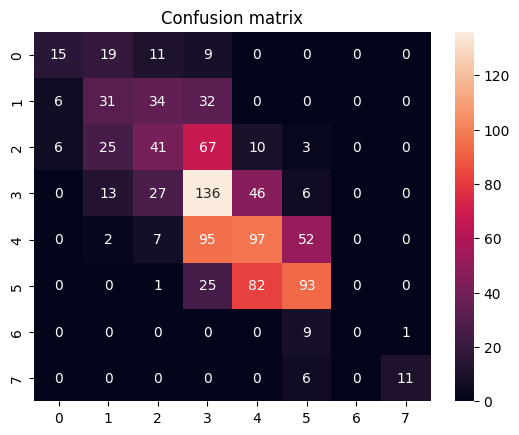

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Fit the logistic regression model to the train data 
log_reg.fit(standardized_X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(standardized_X_test)

# Confusion matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')

# Print classification report
print(classification_report(y_test, y_pred))


**Try oversampling to check if accuarcy improves**

In [50]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
# Oversample the minority class using SMOTE
oversampler = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(standardized_X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.30      0.52      0.38        54
           2       0.28      0.35      0.31       103
           3       0.34      0.38      0.36       152
           4       0.43      0.36      0.39       228
           5       0.44      0.35      0.39       253
           6       0.52      0.38      0.44       201
           7       0.09      0.50      0.16        10
           8       0.44      0.88      0.59        17

    accuracy                           0.38      1018
   macro avg       0.36      0.46      0.38      1018
weighted avg       0.41      0.38      0.39      1018



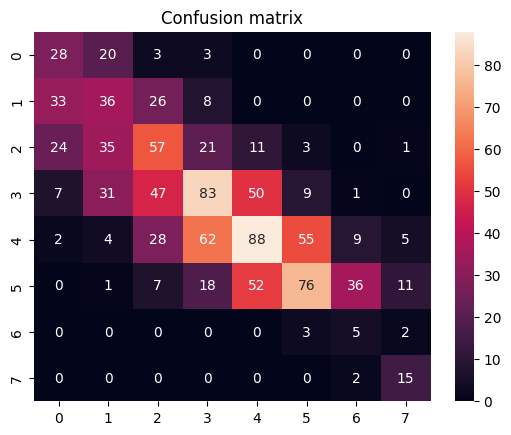

In [51]:
#use the oversampled data and rebuild the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Fit the logistic regression model to the train data 
log_reg.fit(X_train_oversampled, y_train_oversampled)

# Predict on test set
y_pred = log_reg.predict(standardized_X_test)

# Confusion matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')

# Print classification report
print(classification_report(y_test, y_pred))


**It is observed that accuracy degraded after oversampling. Oversampling lead to overfitting and decrease in prediction accuarcy. Check for one more algorithm if oversampling works.**

**Decision Tree:**

              precision    recall  f1-score   support

           1       0.52      0.26      0.35        54
           2       0.31      0.34      0.33       103
           3       0.33      0.37      0.35       152
           4       0.33      0.40      0.36       228
           5       0.40      0.33      0.36       253
           6       0.51      0.52      0.51       201
           7       0.20      0.10      0.13        10
           8       1.00      0.94      0.97        17

    accuracy                           0.39      1018
   macro avg       0.45      0.41      0.42      1018
weighted avg       0.40      0.39      0.39      1018



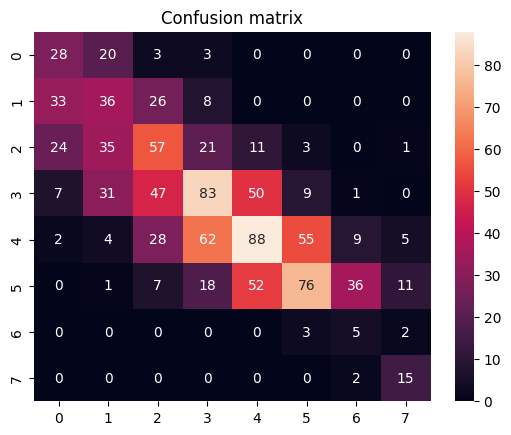

In [81]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(standardized_X_train, y_train)

# Predict on test set
y_pred_dtc = dtc.predict(standardized_X_test)
y_pred_dtc

# Confusion matrix
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')

# Print classification report
print(classification_report(y_test,y_pred_dtc))


**Try oversampling to check if accuarcy improves**



              precision    recall  f1-score   support

           1       0.27      0.61      0.37        54
           2       0.20      0.17      0.18       103
           3       0.26      0.39      0.31       152
           4       0.35      0.23      0.28       228
           5       0.38      0.22      0.28       253
           6       0.41      0.34      0.37       201
           7       0.04      0.30      0.08        10
           8       0.37      1.00      0.54        17

    accuracy                           0.30      1018
   macro avg       0.28      0.41      0.30      1018
weighted avg       0.33      0.30      0.30      1018



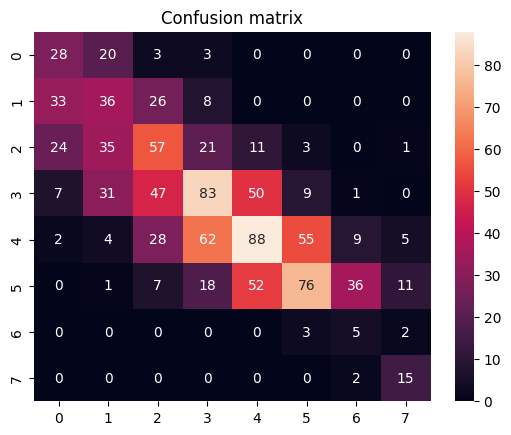

In [82]:
from sklearn.tree import DecisionTreeClassifier 

dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_oversampled, y_train_oversampled)

# Predict on test set
y_pred_dtc = dtc.predict(standardized_X_test)
y_pred_dtc

# Confusion matrix
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')

# Print classification report
print(classification_report(y_test,y_pred_dtc))


**Once again oversampling degraded accuarcy. Considering that rarity of top players is expected, it is concluded that oversampling should not be performed for this dataset.**

**Random Forest:**

              precision    recall  f1-score   support

           1       0.61      0.26      0.36        54
           2       0.34      0.26      0.30       103
           3       0.31      0.33      0.32       152
           4       0.36      0.54      0.43       228
           5       0.42      0.38      0.40       253
           6       0.58      0.49      0.53       201
           7       1.00      0.10      0.18        10
           8       1.00      0.94      0.97        17

    accuracy                           0.42      1018
   macro avg       0.58      0.41      0.44      1018
weighted avg       0.44      0.42      0.41      1018



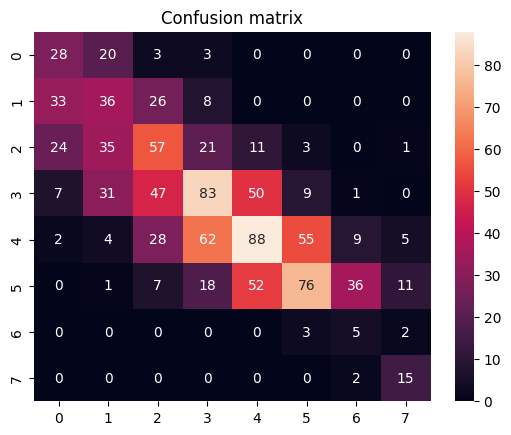

In [55]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Fit the random forest to the training data 
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(standardized_X_train, y_train)

# Predict on test set
y_pred_rfc = rfc.predict(standardized_X_test)
y_pred_rfc

# Confusion matrix
cm_dtc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')

# Print classification report
print(classification_report(y_test,y_pred_rfc))


**XGBoost**

In [74]:
import xgboost
classifier_xgb = xgboost.XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=100,
                                  objective='multi:softmax', reg_alpha=0.5, reg_lambda=1.5,
                                  booster='gbtree', n_jobs=4, min_child_weight=2, base_score= 0.5)

In [75]:
# Map class labels to the range [0, 1, 2, 3, 4, 5, 6, 7] as XGBoost identifies class labels starting from 0
y_mapped_train = np.array(y_train) - 1
y_mapped_test = np.array(y_test) - 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      0.30      0.39        54
           1       0.34      0.25      0.29       103
           2       0.32      0.29      0.31       152
           3       0.35      0.49      0.41       228
           4       0.41      0.41      0.41       253
           5       0.56      0.51      0.53       201
           6       0.00      0.00      0.00        10
           7       1.00      0.94      0.97        17

    accuracy                           0.41      1018
   macro avg       0.44      0.40      0.41      1018
weighted avg       0.42      0.41      0.41      1018



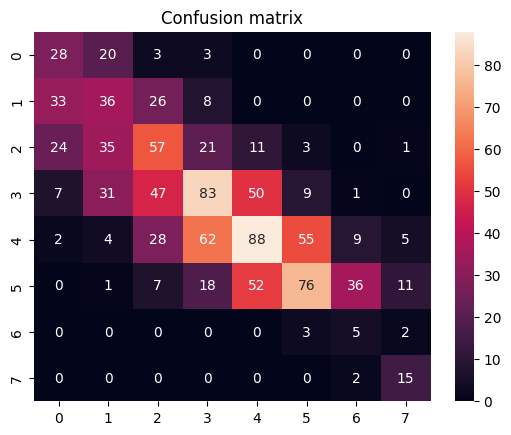

In [76]:
# Fit XGboost on training data
model_xgb = classifier_xgb.fit(standardized_X_train, y_mapped_train)

# Predict on test data
prediction_xgb = model_xgb.predict(standardized_X_test)

# Confusion matrix
cm_dtc = confusion_matrix(y_mapped_test, prediction_xgb)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')

# Print classification report
print(classification_report(y_mapped_test,prediction_xgb))


**Random Forest and XGBoost have the highest and similar accuracies. Considering F1 score, Random Forest and XGBoost have similar scores.F1 score is a more appropriate metric here because the cost of misclassification is different for different leagues.**

**Misclassifying a higher league player as lower league affects company's revenue(as the player does not get a chance to play decreasing the probabilty of win) and misclassifying a lower league player as higher will affect company's revenue and reputation if he/she performs poorly in the game. So, the weighted average F1 score provides a measure of performance of individual leagues, hence it is the most appropriate metric.**

**The weighted average F1 score is same for both Random Forest and XGBoost, so Random Forest is selected for simplicity.** 

**Final Model: Random Forest Classifier based on F1 score**

**Insights for Non-Technical Stakeholders:**

**1. A player's performance is highly dependent on HoursPerWeek,TotalHours, SelectByHotkeys, AssignToHotkeys, UniqueHotkeys, MinimapAttacks, MinimapRightClicks, ActionLatency, TotalMapExplored, WorkersMade,and ComplexAbilitiesUsed. The lesser the ActionLatency, the better performer. All other metrics mentioned above should be high for better performance.**

**2. A random forest classifier has been used for the prediction. While this gives a fair prediction, it is not completely accurate as the F1 score is the range of 40s only. More data is required for accurate prediction.**

**3. This is only a probabilistic approach for predicting a player's rank. In reality there could be many other factors that will affect a player's performance on game day.**



**Suggestions to collect more data:**

**Age, HourPerWeek, and TotalHours are missing for the top league(LeagueIndex=8). Although those values have been imputed for analysis, it is necessary that we have complete data for player's of all leagues for accurate prediction.**

**More data is needed for the players in the higher leagues(LeagueIndex=7,8). It will be helpful to collect data of all players that have held the positions of high league(LeagueIndex=7,8).**

**Data from multiple games has to be collected for better analysis. Other factors like collaboration with the team can be explored for better prediction.**